## Monte Carlo Simulation of a Geometric Brownian Motion

### Initializing Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean_daily_returns = np.array([0.02, 0.03, 0.04]) / 100
cov_matrix = np.array([[0.1, 0.03, 0.05],
                       [0.03, 0.12, 0.04],
                       [0.05, 0.04, 0.15]]) / 10000

### Generate a Geometric Brownian Motion

In [2]:
def simulate_correlated_gbm(mean_returns, cov_matrix, initial_values, num_days):
    """
    Simulate correlated GBM paths for multiple assets.
    """
    num_assets = len(mean_returns)
    chol_decomp = np.linalg.cholesky(cov_matrix)  # Cholesky decomposition for covariance matrix

    # Initialize matrix to store log prices for all assets
    log_prices = np.log(initial_values) * np.ones((num_days, num_assets))

    # Simulate log price paths
    for t in range(1, num_days):
        # Generate correlated random shocks (from Cholesky decomposition)
        correlated_shocks = chol_decomp @ np.random.normal(0, 1, num_assets)

        # GBM formula for each asset
        drift = mean_returns - 0.5 * np.diag(cov_matrix)  
        diffusion = correlated_shocks  # Cholesky handles scaling the shocks
        log_prices[t] = log_prices[t-1] + drift + diffusion  # Update log prices

    # Convert log-prices back to prices
    return np.exp(log_prices)

### Monte Carlo Simulation

In [3]:

def monte_carlo_simulation(mean_returns, cov_matrix, num_simulations, num_days, weights, initial_values):
    """
    Monte Carlo simulation of portfolio paths using correlated GBM.
    """
    num_assets = len(mean_returns)
    portfolio_simulations = np.zeros((num_simulations, num_days))

    for i in range(num_simulations):
        # Simulate correlated GBM paths for all assets
        asset_paths = simulate_correlated_gbm(mean_returns, cov_matrix, initial_values, num_days)
        # Compute portfolio values at each time step
        portfolio_simulations[i, :] = np.dot(asset_paths, weights)

    return portfolio_simulations, asset_paths


### Plotting the Simulation Results

In [5]:
def plot_simulations(portfolio_simulations):
    cmap = plt.cm.plasma  # You can change this to any colormap (e.g., 'plasma', 'inferno', etc.)
    colors = cmap(np.linspace(0, 1, portfolio_simulations.shape[0]))
    # Plot individual simulations with different colors for portfolio
    plt.figure(figsize=(12, 6))
    for i in range(portfolio_simulations.shape[0]):
        plt.plot(portfolio_simulations[i, :], color=colors[i], alpha=0.3)
    plt.title('Monte Carlo Simulation of Portfolio Value')
    plt.xlabel('Days')
    plt.ylabel('Portfolio Value')
    plt.show()

    # Calculate daily returns of the simulated portfolio (percentage change)
    daily_returns = np.diff(portfolio_simulations, axis=1) / portfolio_simulations[:, :-1]
    
    # Plot daily returns of the portfolio
    plt.figure(figsize=(12, 6))
    for i in range(portfolio_simulations.shape[0]):
        plt.plot(daily_returns[i, :], color='blue', alpha=0.1)
    plt.title('Daily Returns of Simulated Portfolio')
    plt.xlabel('Days')
    plt.ylabel('Daily Return')
    plt.show()

    # Plot histogram of daily returns of the portfolio
    plt.figure(figsize=(12, 6))
    plt.hist(daily_returns.flatten(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Histogram of Daily Returns of Simulated Portfolio')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.show()

    # Plot distribution of final portfolio values (at last day)
    final_values = portfolio_simulations[:, -1]
    plt.figure(figsize=(12, 6))
    plt.hist(final_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Final Portfolio Values (Day 252)')
    plt.xlabel('Portfolio Value at Day 252')
    plt.ylabel('Frequency')
    plt.show()

    print(f"Mean Final Portfolio Value: {np.mean(final_values):.2f}")
    print(f"Standard Deviation of Final Portfolio Value: {np.std(final_values):.2f}")

### Run the Code

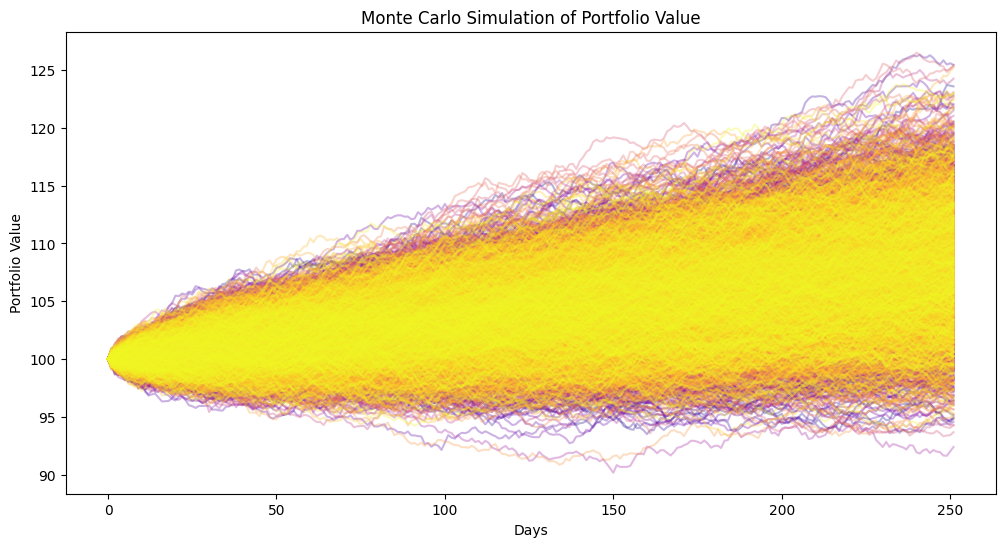

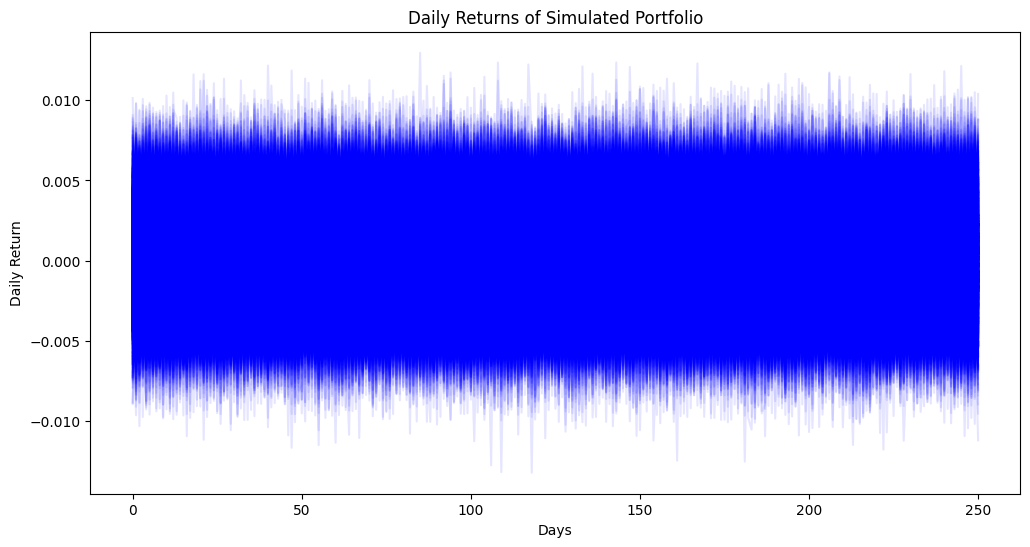

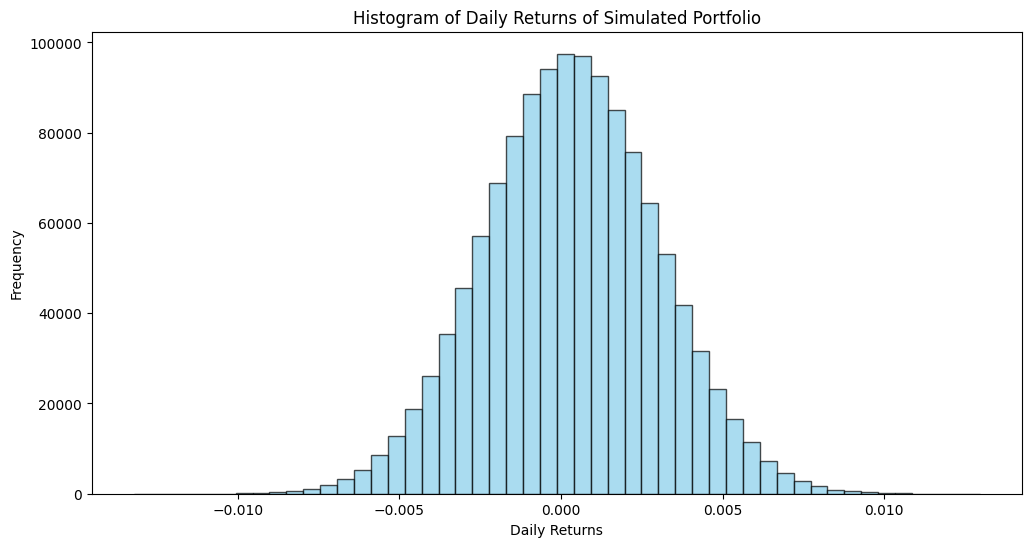

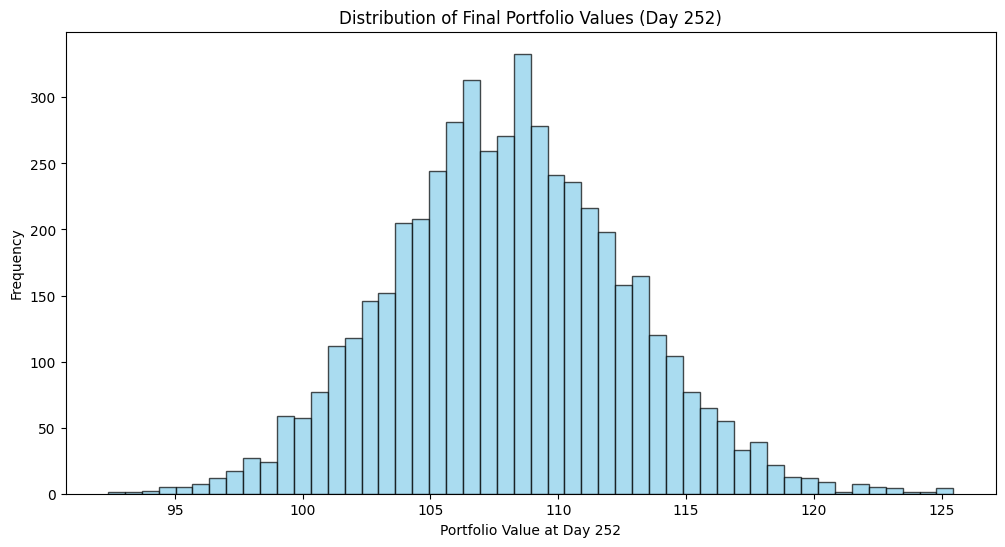

Mean Final Portfolio Value: 108.05
Standard Deviation of Final Portfolio Value: 4.60


In [ ]:
def main(mean_returns, cov_matrix, weights, num_simulations=5000, num_days=252, initial_values=100, seed=42):
    np.random.seed(seed)
    initial_values = np.ones(len(mean_returns)) * initial_values  # Same initial value for all assets
    portfolio_simulations, _ = monte_carlo_simulation(mean_returns, cov_matrix, num_simulations, num_days, weights, initial_values)
    plot_simulations(portfolio_simulations)

# Example usage
if __name__ == "__main__":
    weights = np.array([0.2, 0.5, 0.3])
    main(mean_daily_returns, cov_matrix, weights)